<a href="https://colab.research.google.com/github/akhatabhowmik/UWCDS-Connected-Dominating-Set-based-Coverage-and-Connectivity-Protocol-for-UWSNs/blob/main/UWCDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the area of deployment (A): 100
Enter the number of nodes (n): 20
Enter the number of clusters (m): 3
Enter sink sensing range: 40

Initial Node Positions:
Node 0: Position = (95.20, 96.60)
Node 1: Position = (55.64, 6.86)
Node 2: Position = (15.70, 81.34)
Node 3: Position = (63.66, 86.19)
Node 4: Position = (28.08, 67.45)
Node 5: Position = (22.23, 38.52)
Node 6: Position = (62.86, 24.68)
Node 7: Position = (13.67, 45.43)
Node 8: Position = (99.91, 59.47)
Node 9: Position = (77.09, 67.82)
Node 10: Position = (65.68, 72.60)
Node 11: Position = (97.10, 62.32)
Node 12: Position = (79.38, 40.37)
Node 13: Position = (77.20, 16.10)
Node 14: Position = (43.56, 25.22)
Node 15: Position = (37.60, 76.29)
Node 16: Position = (42.09, 26.99)
Node 17: Position = (17.10, 54.20)
Node 18: Position = (36.81, 80.36)
Node 19: Position = (30.64, 6.78)

Nodes in Each Cluster:
Cluster 0: Nodes = [0, 3, 8, 9, 10, 11, 12]
Cluster 1: Nodes = [1, 6, 13, 14, 16, 19]
Cluster 2: Nodes = [2, 4, 5, 7, 15, 17, 

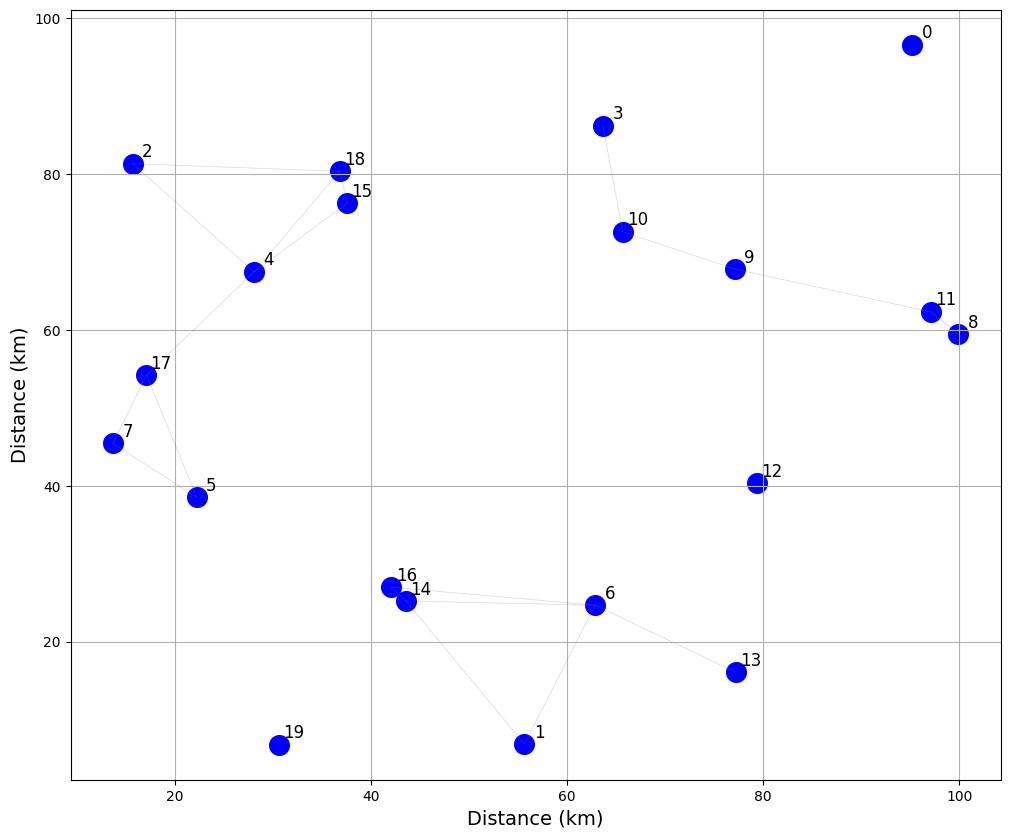

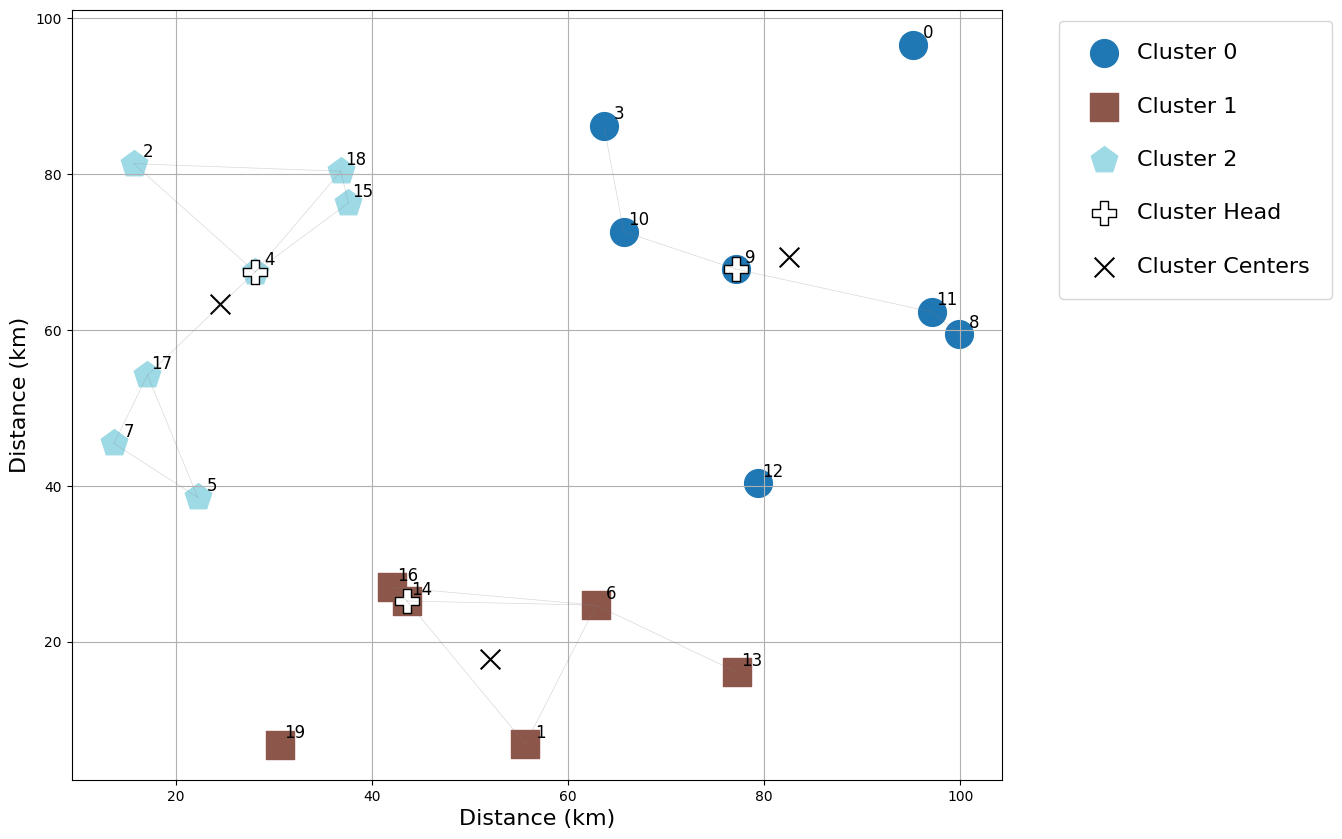

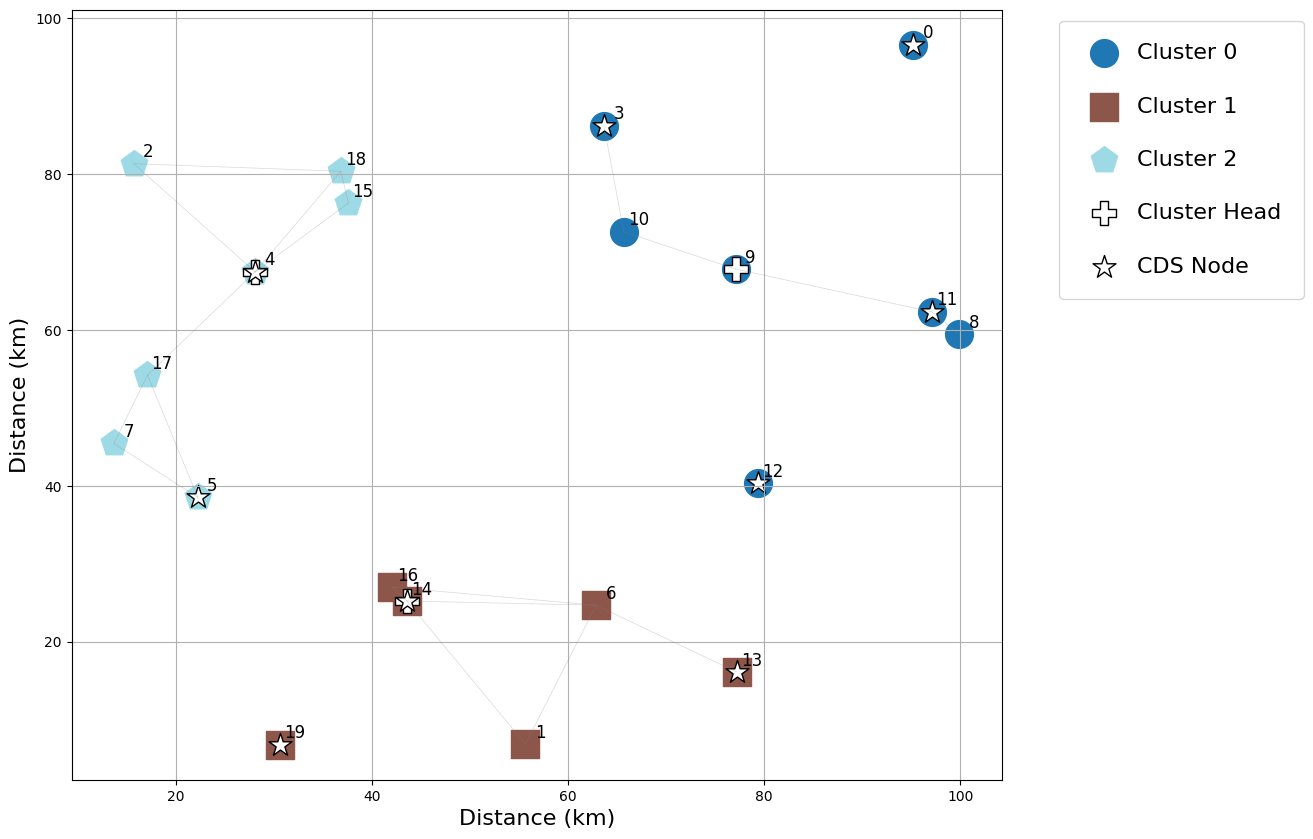

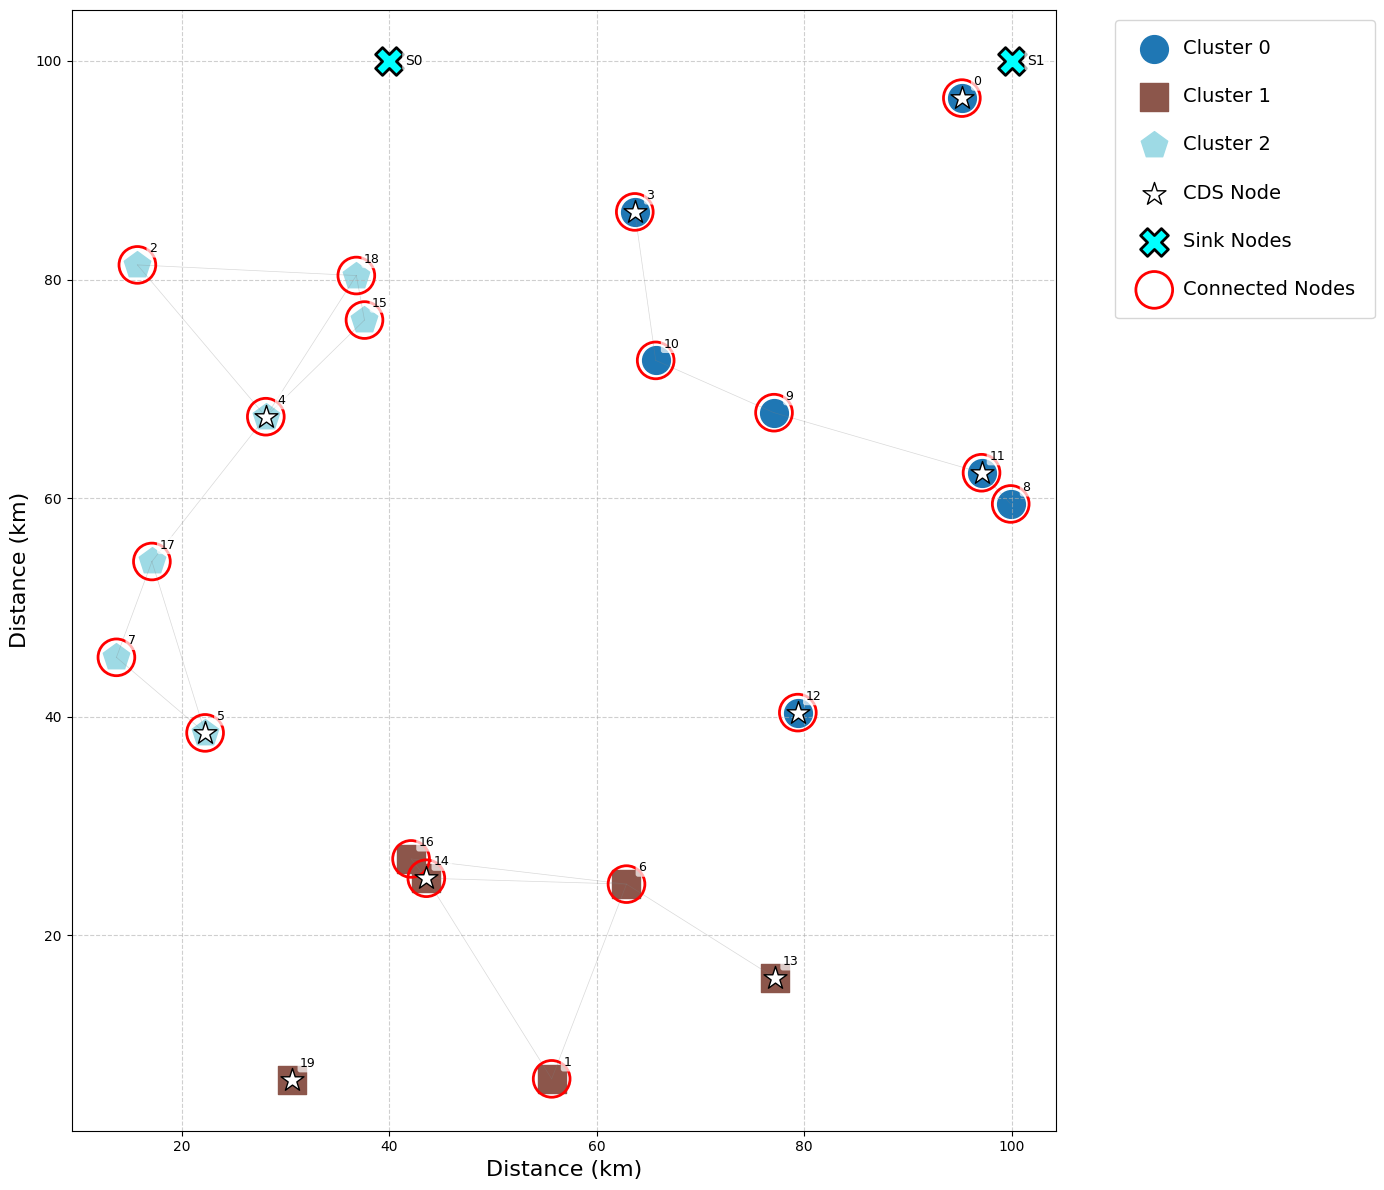


=== Final Connection Report ===
Total connected nodes: 18/20 (90.0%)
Non-connected nodes: [13, 19]

Cluster 0:
  Connected: 7/7
  CDS nodes: [0, 3, 11, 12]

Cluster 1:
  Connected: 4/6
  CDS nodes: [13, 14, 19]

Cluster 2:
  Connected: 7/7
  CDS nodes: [4, 5]


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import deque

def euclidean_distance(node1, node2):
    return np.sqrt((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)

def sense_neighbors(nodes, R_C):
    n = len(nodes)
    neighbor_lists = {i: [] for i in range(n)}
    for i in range(n):
        for j in range(n):
            if i != j:
                distance = euclidean_distance(nodes[i], nodes[j])
                if distance <= R_C:
                    neighbor_lists[i].append(j)
    return neighbor_lists

def form_cds(cluster_nodes, neighbor_lists, cluster_center):
    CDS = set()
    CN = set()

    remaining_nodes = list(cluster_nodes)
    np.random.shuffle(remaining_nodes)
    D1 = remaining_nodes.pop(0)
    CDS.add(D1)
    CN.add(D1)
    CN.update(neighbor_lists[D1])

    print(f"\nInitial Dominator (D1): Node {D1}")
    print(f"Nodes covered after adding D1: {CN}")

    UN = set(cluster_nodes) - CN
    step = 1

    while UN:
        step += 1
        max_neighbors = -1
        candidates = []

        for node in UN:
            if node not in CN:
                uncovered_neighbors = set(neighbor_lists[node]) - CN
                num_uncovered_neighbors = len(uncovered_neighbors)

                if num_uncovered_neighbors > max_neighbors:
                    max_neighbors = num_uncovered_neighbors
                    candidates = [node]
                elif num_uncovered_neighbors == max_neighbors:
                    candidates.append(node)

        if candidates:
            if len(candidates) == 1:
                Di = candidates[0]
            else:
                distances = []
                for node in candidates:
                    distance = euclidean_distance(nodes[node], cluster_center)
                    distances.append((node, distance))
                Di = min(distances, key=lambda x: x[1])[0]

            CDS.add(Di)
            CN.add(Di)
            CN.update(neighbor_lists[Di])

            print(f"\nStep {step}: Selected Dominator (D{step}): Node {Di}")
            print(f"Nodes covered after adding D{step}: {CN}")

            UN -= CN

    return CDS

# User input
A = float(input("Enter the area of deployment (A): "))
n = int(input("Enter the number of nodes (n): "))
m = int(input("Enter the number of clusters (m): "))
sensing_range = float(input("Enter sink sensing range: "))

# Node deployment
nodes = np.random.uniform(0, A, (n, 2))

print("\nInitial Node Positions:")
for idx, (x, y) in enumerate(nodes):
    print(f"Node {idx}: Position = ({x:.2f}, {y:.2f})")

# Cluster formation
kmeans = KMeans(n_clusters=m, random_state=0).fit(nodes)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

clusters = {i: [] for i in range(m)}
for idx, label in enumerate(cluster_labels):
    clusters[label].append(idx)

print("\nNodes in Each Cluster:")
for i in range(m):
    print(f"Cluster {i}: Nodes = {clusters[i]}")

# Calculate R_C based on node density
node_density = n / (A * A)
c = 1.0  # Tunable constant
R_C = c / np.sqrt(node_density)
print(f"\nCommunication Radius (R_C) for all nodes: {R_C:.2f}")

# Sense neighbors using the calculated R_C
neighbor_lists = sense_neighbors(nodes, R_C)

print("\nNeighbor Lists for Each Node:")
for node, neighbors in neighbor_lists.items():
    print(f"Node {node}: Neighbors = {neighbors}")

# Select cluster heads
cluster_heads = {}
for i in range(m):
    distances = [(node_idx, euclidean_distance(nodes[node_idx], cluster_centers[i]))
                for node_idx in clusters[i]]
    cluster_head = min(distances, key=lambda x: x[1])[0]
    cluster_heads[i] = cluster_head
    print(f"\nCluster {i}: Cluster Head = Node {cluster_head} (Distance = {min(distances, key=lambda x: x[1])[1]:.2f})")

# Form CDS
cds_clusters = {}
for i in range(m):
    print(f"\nForming CDS for Cluster {i}:")
    cds_clusters[i] = form_cds(clusters[i], neighbor_lists, cluster_centers[i])

print("\nConnected Dominating Sets (CDS) for Each Cluster:")
for i in range(m):
    print(f"Cluster {i}: CDS = {cds_clusters[i]}")

# Calculate sink positions
num_sinks = math.ceil(A / (2 * sensing_range))
sink_positions = [(min(sensing_range + i*2*sensing_range, A), A) for i in range(num_sinks)]

# Initialize connection structures
connected_nodes = set()
non_connected_nodes = set(range(n))

# Sense neighbors for all nodes using the global R_C
global_neighbor_lists = {i: [] for i in range(n)}
for i in range(n):
    for j in range(n):
        if i != j and euclidean_distance(nodes[i], nodes[j]) <= R_C:
            global_neighbor_lists[i].append(j)

# Step 1: Connect only CDS nodes within range of sinks
print("\n=== Connecting CDS Nodes in Range of Sinks ===")
all_cds_nodes = set().union(*cds_clusters.values())
cds_in_sink_range = set()

for sink_idx, sink_pos in enumerate(sink_positions):
    print(f"\nProcessing Sink {sink_idx} at position {sink_pos}")
    for cds_node in all_cds_nodes:
        if euclidean_distance(nodes[cds_node], sink_pos) <= 2 * sensing_range:
            cds_in_sink_range.add(cds_node)
            if cds_node not in connected_nodes:
                connected_nodes.add(cds_node)
                non_connected_nodes.discard(cds_node)
                print(f"Added CDS node {cds_node} (in range of Sink {sink_idx}) to connected set")

# Step 2: Connect all neighbors of CDS nodes within range
print("\n=== Connecting Neighbors of CDS Nodes ===")
queue = deque(cds_in_sink_range)
visited = set(cds_in_sink_range)

while queue:
    current = queue.popleft()
    print(f"\nProcessing node {current}'s neighbors: {global_neighbor_lists[current]}")

    for neighbor in global_neighbor_lists[current]:
        if neighbor in non_connected_nodes:
            print(f"Connecting neighbor {neighbor}")
            connected_nodes.add(neighbor)
            non_connected_nodes.remove(neighbor)
            if neighbor in cds_in_sink_range:
                print(f"Neighbor {neighbor} is a CDS node in sink range, adding to queue")
                queue.append(neighbor)

# Define marker styles for clusters
cluster_markers = ['o', 's', 'p', 'D', 'v', '^', '*', 'h', '8', '>', '<', 'd']
cluster_colors = plt.cm.tab20(np.linspace(0, 1, m))

def plot_initial_deployment():
    plt.figure(figsize=(12, 10))
    for idx, (x, y) in enumerate(nodes):
        plt.scatter(x, y, color='blue', marker='o', s=200)
        plt.text(x + 1.5, y + 1.5, f'{idx}', fontsize=12, ha='center', va='center')

    for i in range(n):
        for j in neighbor_lists[i]:
            if i < j:
                plt.plot([nodes[i][0], nodes[j][0]], [nodes[i][1], nodes[j][1]],
                         'gray', alpha=0.3, linewidth=0.5)

    plt.xlabel('Distance (km)', fontsize= 14)
    plt.ylabel('Distance (km)', fontsize= 14)
    plt.grid(True)
    plt.show()

def plot_cluster_formation():
    plt.figure(figsize=(12, 10))

    for i in range(m):
        for node_idx in clusters[i]:
            x, y = nodes[node_idx]
            plt.scatter(x, y, color=cluster_colors[i],
                       marker=cluster_markers[i%len(cluster_markers)], s=400,
                       label=f'Cluster {i}' if node_idx == clusters[i][0] else "")
            plt.text(x + 1.5, y + 1.5, f'{node_idx}', fontsize=12, ha='center', va='center')

    for i in range(n):
        for j in neighbor_lists[i]:
            if i < j:
                plt.plot([nodes[i][0], nodes[j][0]], [nodes[i][1], nodes[j][1]],
                         'gray', alpha=0.3, linewidth=0.5)

    cluster_head_label_added = False
    for i in range(m):
        node_idx = cluster_heads[i]
        x, y = nodes[node_idx]
        plt.scatter(x, y, color='white', edgecolor='black', s=300, marker='P',
                   label='Cluster Head' if not cluster_head_label_added else "")
        cluster_head_label_added = True

    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black',
               marker='x', s=200, label='Cluster Centers')

     # Create legend with spacing between items
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
              labelspacing=1.5,  # Vertical space between entries
              borderpad=1.0,     # Space around the legend
              handletextpad=0.5, fontsize= 16)
    plt.xlabel('Distance (km)', fontsize= 16)
    plt.ylabel('Distance (km)', fontsize= 16)
    plt.grid(True)
    plt.show()

def plot_cds_formation():
    plt.figure(figsize=(12, 10))

    for i in range(m):
        for node_idx in clusters[i]:
            x, y = nodes[node_idx]
            plt.scatter(x, y, color=cluster_colors[i],
                       marker=cluster_markers[i%len(cluster_markers)], s=400,
                       label=f'Cluster {i}' if node_idx == clusters[i][0] else "")
            plt.text(x + 1.5, y + 1.5, f'{node_idx}', fontsize=12, ha='center', va='center')

    for i in range(n):
        for j in neighbor_lists[i]:
            if i < j:
                plt.plot([nodes[i][0], nodes[j][0]], [nodes[i][1], nodes[j][1]],
                         'gray', alpha=0.3, linewidth=0.5)

    cluster_head_label_added = False
    for i in range(m):
        node_idx = cluster_heads[i]
        x, y = nodes[node_idx]
        plt.scatter(x, y, color='white', edgecolor='black', s=300, marker='P',
                   label='Cluster Head' if not cluster_head_label_added else "")
        cluster_head_label_added = True

    cds_label_added = False
    for i in range(m):
        for node_idx in cds_clusters[i]:
            x, y = nodes[node_idx]
            plt.scatter(x, y, color='white', edgecolor='black', s=300, marker='*',
                       label='CDS Node' if not cds_label_added else "")
            cds_label_added = True


     # Create legend with spacing between items
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
              labelspacing=1.5,  # Vertical space between entries
              borderpad=1.0,     # Space around the legend
              handletextpad=0.5, fontsize= 16)
    plt.xlabel('Distance (km)', fontsize= 16)
    plt.ylabel('Distance (km)', fontsize= 16)
    plt.grid(True)
    plt.show()

def plot_network_connectivity():
    plt.figure(figsize=(14, 12))

    # Plot all nodes with cluster-specific markers and colors
    for i in range(m):
        for node_idx in clusters[i]:
            x, y = nodes[node_idx]
            plt.scatter(x, y, color=cluster_colors[i],
                       marker=cluster_markers[i%len(cluster_markers)], s=400,
                       label=f'Cluster {i}' if node_idx == clusters[i][0] else "")
            # Add node ID text
            plt.text(x+1.5, y+1.5, str(node_idx),
                    fontsize=9, ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

    for i in range(n):
        for j in neighbor_lists[i]:
            if i < j:
                plt.plot([nodes[i][0], nodes[j][0]], [nodes[i][1], nodes[j][1]],
                         'gray', alpha=0.3, linewidth=0.5)


    # Plot CDS nodes with star markers
    all_cds_nodes = set().union(*cds_clusters.values())
    for node_idx in all_cds_nodes:
        x, y = nodes[node_idx]
        plt.scatter(x, y, color='white', edgecolor='black', s=300, marker='*',
                   zorder=3, label='CDS Node' if node_idx == list(all_cds_nodes)[0] else "")



    # Plot sink nodes
    sink_x, sink_y = zip(*sink_positions)
    plt.scatter(sink_x, sink_y, marker='X', s=400,
               color='cyan', edgecolor='black', linewidth=2,
               zorder=3, label='Sink Nodes')
    for idx, (x, y) in enumerate(sink_positions):
        plt.text(x+1.5, y, f'S{idx}', fontsize=10, ha='left', va='center',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

    # Highlight connected nodes
    connected_pos = nodes[list(connected_nodes)]
    plt.scatter(connected_pos[:, 0], connected_pos[:, 1],
               facecolors='none', edgecolors='red',
               s=700, linewidths=2, zorder=2, label='Connected Nodes')

    plt.xlabel('Distance (km)', fontsize= 16)
    plt.ylabel('Distance (km)', fontsize= 16)
    # Create legend with spacing between items
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
              labelspacing=1.5,  # Vertical space between entries
              borderpad=1.0,     # Space around the legend
              handletextpad=0.5, fontsize= 14)


    # Adjust subplot to make room for legend
    plt.subplots_adjust(bottom=0.25)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Generate all plots
plot_initial_deployment()
plot_cluster_formation()
plot_cds_formation()
plot_network_connectivity()

# Print final report
print("\n=== Final Connection Report ===")
print(f"Total connected nodes: {len(connected_nodes)}/{n} ({len(connected_nodes)/n:.1%})")
print(f"Non-connected nodes: {sorted(non_connected_nodes)}")

for cluster_id in range(m):
    cluster_conn = [n for n in clusters[cluster_id] if n in connected_nodes]
    print(f"\nCluster {cluster_id}:")
    print(f"  Connected: {len(cluster_conn)}/{len(clusters[cluster_id])}")
    print(f"  CDS nodes: {sorted(cds_clusters[cluster_id])}")

Enter the transmission power (p_r) in watts: 0.2
Completed 20 nodes: Avg energy = 287.43 J
Completed 25 nodes: Avg energy = 323.70 J
Completed 30 nodes: Avg energy = 395.86 J
Completed 35 nodes: Avg energy = 488.66 J
Completed 40 nodes: Avg energy = 604.92 J
Completed 45 nodes: Avg energy = 692.85 J
Completed 50 nodes: Avg energy = 822.29 J
Completed 55 nodes: Avg energy = 947.00 J
Completed 60 nodes: Avg energy = 1087.13 J
Completed 65 nodes: Avg energy = 1219.82 J
Completed 70 nodes: Avg energy = 1368.15 J


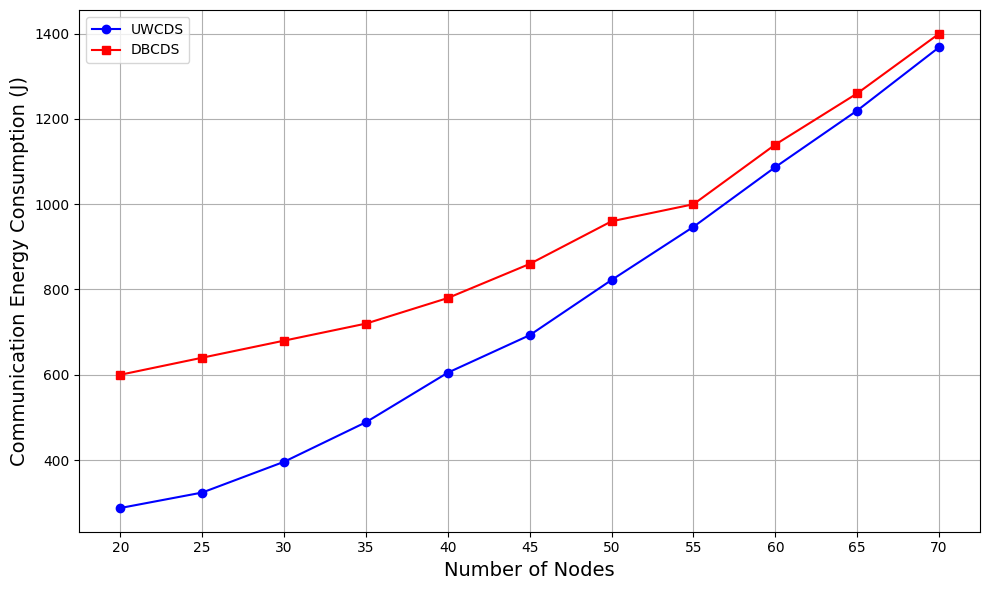


=== Summary ===
Average CDS Energy Consumption (J) for p_r = 0.2W:
Nodes: 20, Avg Energy: 287.43
Nodes: 25, Avg Energy: 323.70
Nodes: 30, Avg Energy: 395.86
Nodes: 35, Avg Energy: 488.66
Nodes: 40, Avg Energy: 604.92
Nodes: 45, Avg Energy: 692.85
Nodes: 50, Avg Energy: 822.29
Nodes: 55, Avg Energy: 947.00
Nodes: 60, Avg Energy: 1087.13
Nodes: 65, Avg Energy: 1219.82
Nodes: 70, Avg Energy: 1368.15


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(42)

def euclidean_distance(node1, node2):
    return np.sqrt((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)

def sense_neighbors(nodes, cluster_nodes, R_C):
    neighbor_lists = {i: [] for i in cluster_nodes}
    for i in cluster_nodes:
        for j in range(len(nodes)):
            if i != j:
                distance = euclidean_distance(nodes[i], nodes[j])
                if distance <= R_C:
                    neighbor_lists[i].append(j)
    return neighbor_lists

def form_cds(cluster_nodes, neighbor_lists, cluster_center):
    CDS = set()
    CN = set()

    remaining_nodes = list(cluster_nodes)
    np.random.shuffle(remaining_nodes)
    if not remaining_nodes:
        return CDS, CN
    D1 = remaining_nodes.pop(0)
    CDS.add(D1)
    CN.add(D1)
    CN.update(neighbor_lists[D1])

    UN = set(cluster_nodes) - CN
    while UN:
        max_neighbors = -1
        candidates = []
        for node in UN:
            uncovered_neighbors = set(neighbor_lists[node]) - CN
            num_uncovered_neighbors = len(uncovered_neighbors)
            if num_uncovered_neighbors > max_neighbors and num_uncovered_neighbors > 0:
                max_neighbors = num_uncovered_neighbors
                candidates = [node]
            elif num_uncovered_neighbors == max_neighbors and num_uncovered_neighbors > 0:
                candidates.append(node)
        if candidates:
            if len(candidates) > 1:
                distances = [(node, euclidean_distance(nodes[node], cluster_center)) for node in candidates]
                Di = min(distances, key=lambda x: x[1])[0]
            else:
                Di = candidates[0]
            CDS.add(Di)
            CN.add(Di)
            CN.update(neighbor_lists[Di])
            UN = set(cluster_nodes) - CN
        else:
            break
    return CDS

def absorption_coefficient(f):
    """Calculate absorption coefficient a(f) in dB/m."""
    f2 = f * f
    term1 = 0.11 * (1e-3 * f2) / (1 + f2)
    term2 = 44 * (1e-3 * f2) / (4100 + f2)
    term3 = 2.75e-7 * f2
    term4 = 3e-6
    return term1 + term2 + term3 + term4

def transmission_energy(p_r, M_b, S_v, d, l, f):
    """Calculate E_tx for one packet over distance d."""
    T_p = M_b / S_v
    a_f = absorption_coefficient(f)
    b = 10 ** (a_f / 10)
    A_d = (d ** l) * (b ** d)
    return p_r * T_p * A_d

# Parameters
A = 100.0  # deployment area
m = 10      # number of clusters
sensing_range = 40.0  # sink sensing range
base_R_C = 8.0  # base communication range
M_b = 1024  # packet size (bits)
S_v = 500  # transmission speed (bits/s)
l = 1.5    # spreading factor (practical)
f = 25     # carrier frequency (kHz)
E_initial = 1000.0  # initial node energy (J)
num_simulations = 50  # Number of simulations per node count

# Get p_r from user input
p_r = float(input("Enter the transmission power (p_r) in watts: "))

node_counts = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
avg_energy = []

# Calculate sink positions
num_sinks = int(np.ceil(A / (2 * sensing_range)))
sink_positions = [(min(sensing_range + i * 2 * sensing_range, A), A) for i in range(num_sinks)]

for n in node_counts:
    energy_values = []

    for sim in range(num_simulations):
        # Deploy nodes
        nodes = np.random.uniform(0, A, (n, 2))

        # Initialize node energies
        node_energies = [E_initial] * n

        # Clustering with KMeans
        kmeans = KMeans(n_clusters=m, random_state=sim).fit(nodes)  # Different seed for each simulation
        cluster_labels = kmeans.labels_
        cluster_centers = kmeans.cluster_centers_

        clusters = {i: [] for i in range(m)}
        for idx, label in enumerate(cluster_labels):
            clusters[label].append(idx)

        # Calculate cluster-specific R_C
        R_C_clusters = {}
        for i in range(m):
            if len(clusters[i]) > 0:
                total_distance = sum(euclidean_distance(nodes[idx], cluster_centers[i]) for idx in clusters[i])
                avg_distance = total_distance / len(clusters[i])
                R_C_clusters[i] = base_R_C + avg_distance * 0.3
            else:
                R_C_clusters[i] = base_R_C

        # Form CDS and neighbor lists
        cds_clusters = {}
        neighbor_lists = {}
        for i in range(m):
            if len(clusters[i]) > 0:
                neighbor_lists[i] = sense_neighbors(nodes, clusters[i], R_C_clusters[i])
                cds_clusters[i] = form_cds(clusters[i], neighbor_lists[i], cluster_centers[i])
            else:
                cds_clusters[i] = set()

        # Select cluster heads
        cluster_heads = {}
        for i in range(m):
            if len(clusters[i]) > 0:
                distances = [(idx, euclidean_distance(nodes[idx], cluster_centers[i])) for idx in clusters[i]]
                cluster_heads[i] = min(distances, key=lambda x: x[1])[0]
            else:
                cluster_heads[i] = None

        # Connectivity calculation
        connected_nodes = set()
        for i in range(m):
            if cluster_heads[i] is not None:
                for sink_pos in sink_positions:
                    if euclidean_distance(nodes[cluster_heads[i]], sink_pos) <= sensing_range:
                        connected_nodes.add(cluster_heads[i])
                        break

        for i in range(m):
            if cluster_heads[i] is not None and cluster_heads[i] in connected_nodes:
                for cds_node in cds_clusters[i]:
                    if cds_node != cluster_heads[i] and euclidean_distance(nodes[cluster_heads[i]], nodes[cds_node]) <= R_C_clusters[i]:
                        connected_nodes.add(cds_node)
                        connected_nodes.update(neighbor_lists[i].get(cds_node, []))

        # Calculate communication energy
        C_e_total = 0
        for i in range(m):
            if len(clusters[i]) > 0:
                R_C = R_C_clusters[i]
                E_tx = transmission_energy(p_r, M_b, S_v, R_C, l, f)
                for cds_node in cds_clusters[i]:
                    t_n = len(neighbor_lists[i].get(cds_node, [])) * 1.5
                    if cds_node == cluster_heads[i] and cds_node in connected_nodes:
                        t_n += 5
                    t_n = min(t_n, 10)
                    C_e = E_tx * max(t_n, 1)
                    C_e = min(C_e, node_energies[cds_node])
                    node_energies[cds_node] -= C_e
                    C_e_total += C_e

        energy_values.append(C_e_total)

    avg_energy.append(np.mean(energy_values))
    print(f"Completed {n} nodes: Avg energy = {avg_energy[-1]:.2f} J")

# Reference energy consumption
reference_nodes = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
reference_energy = [600, 640, 680, 720, 780, 860, 960, 1000, 1140, 1260, 1400]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(node_counts, avg_energy, marker='o', linestyle='-', color='b', label=f'UWCDS')
plt.plot(reference_nodes, reference_energy, marker='s', linestyle='-', color='r', label='DBCDS')
plt.xlabel("Number of Nodes", fontsize=14)
plt.ylabel("Communication Energy Consumption (J)", fontsize= 14)
plt.grid(True)
plt.xticks(node_counts)
plt.legend()
plt.tight_layout()
plt.savefig(f'cds_energy_plot_p_r_{p_r}.png')
plt.show()

# Print summary
print("\n=== Summary ===")
print(f"Average CDS Energy Consumption (J) for p_r = {p_r}W:")
for n, energy in zip(node_counts, avg_energy):
    print(f"Nodes: {n}, Avg Energy: {energy:.2f}")

Nodes: 20, R_C: 44.72m, Raw Attenuation: 306.75
Nodes: 25, R_C: 40.00m, Raw Attenuation: 258.79
Nodes: 30, R_C: 36.51m, Raw Attenuation: 225.27
Nodes: 35, R_C: 33.81m, Raw Attenuation: 200.36
Nodes: 40, R_C: 31.62m, Raw Attenuation: 181.05
Nodes: 45, R_C: 29.81m, Raw Attenuation: 165.57
Nodes: 50, R_C: 28.28m, Raw Attenuation: 152.86
Nodes: 55, R_C: 26.97m, Raw Attenuation: 142.21
Nodes: 60, R_C: 25.82m, Raw Attenuation: 133.13
Nodes: 65, R_C: 24.81m, Raw Attenuation: 125.31
Nodes: 70, R_C: 23.90m, Raw Attenuation: 118.47


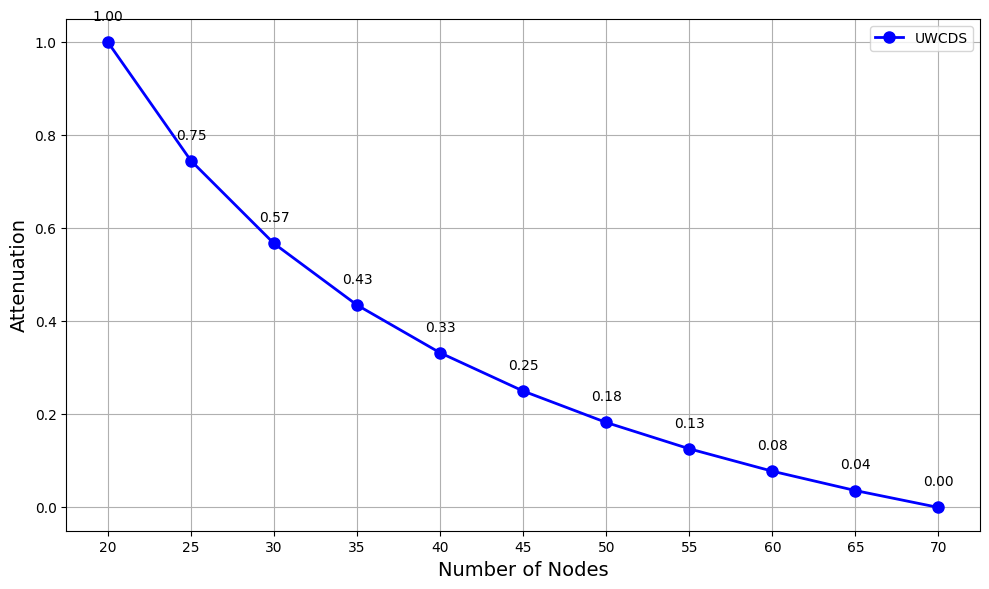


Attenuation Results:
Nodes: 20, Raw Attenuation: 306.75, Normalized: 1.0000
Nodes: 25, Raw Attenuation: 258.79, Normalized: 0.7452
Nodes: 30, Raw Attenuation: 225.27, Normalized: 0.5672
Nodes: 35, Raw Attenuation: 200.36, Normalized: 0.4350
Nodes: 40, Raw Attenuation: 181.05, Normalized: 0.3324
Nodes: 45, Raw Attenuation: 165.57, Normalized: 0.2501
Nodes: 50, Raw Attenuation: 152.86, Normalized: 0.1826
Nodes: 55, Raw Attenuation: 142.21, Normalized: 0.1261
Nodes: 60, Raw Attenuation: 133.13, Normalized: 0.0779
Nodes: 65, Raw Attenuation: 125.31, Normalized: 0.0363
Nodes: 70, Raw Attenuation: 118.47, Normalized: 0.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Set random seed for reproducibility
np.random.seed(42)

def euclidean_distance(node1, node2):
    return np.sqrt((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)

def absorption_coefficient(f):
    """Calculate absorption coefficient a(f) in dB/m."""
    f2 = f * f
    term1 = 0.11 * (1e-3 * f2) / (1 + f2)
    term2 = 44 * (1e-3 * f2) / (4100 + f2)
    term3 = 2.75e-7 * f2
    term4 = 3e-6
    return term1 + term2 + term3 + term4

# Fixed parameters
A = 200.0  # deployment area (100m x 100m)
m = 5      # number of clusters
l = 1.5    # spreading factor
f = 15     # carrier frequency (kHz)
num_simulations = 50  # Number of simulations per node count
c = 1.0    # Tunable constant for R_C calculation

# Pre-calculate acoustic parameters
a_f = absorption_coefficient(f)
b = 10 ** (a_f / 10)  # Convert absorption coefficient to linear scale

node_counts = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
raw_attenuation = []

for n in node_counts:
    attenuation_values = []
    node_density = n / (A * A)
    R_C = c / np.sqrt(node_density)  # Calculate R_C based on node density

    for sim in range(num_simulations):
        # Deploy nodes randomly in the area
        nodes = np.random.uniform(0, A, (n, 2))

        # Perform clustering with KMeans
        kmeans = KMeans(n_clusters=m, random_state=sim).fit(nodes)
        cluster_labels = kmeans.labels_
        cluster_centers = kmeans.cluster_centers_

        # Calculate cluster distances and attenuation
        cluster_attenuation = []
        for i in range(m):
            cluster_nodes = np.where(cluster_labels == i)[0]
            if len(cluster_nodes) > 0:
                # Calculate average distance to cluster center
                distances = [euclidean_distance(nodes[idx], cluster_centers[i])
                            for idx in cluster_nodes]
                avg_distance = np.mean(distances)

                # Calculate attenuation for this cluster
                A_d = (R_C ** l) * (b ** R_C)
                cluster_attenuation.append(A_d)

        # Store average attenuation for this simulation
        if cluster_attenuation:
            attenuation_values.append(np.mean(cluster_attenuation))

    # Store raw attenuation values for normalization
    raw_attenuation.append(np.mean(attenuation_values))
    print(f"Nodes: {n}, R_C: {R_C:.2f}m, Raw Attenuation: {raw_attenuation[-1]:.2f}")

# Normalize the attenuation values
scaler = MinMaxScaler()
normalized_attenuation = scaler.fit_transform(np.array(raw_attenuation).reshape(-1, 1)).flatten()

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(node_counts, normalized_attenuation, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8, label='UWCDS')
# Plot normalized attenuation values as text next to markers
for x, y, attenuation in zip(node_counts, normalized_attenuation, raw_attenuation):  # Changed zip order
    plt.text(x+0.01, y + 0.04, f'{y:.2f}', ha='center', va='bottom')  # Display normalized value with 4 decimals
plt.xlabel("Number of Nodes", fontsize= 14)
plt.ylabel("Attenuation", fontsize= 14)  # Changed y-axis label
plt.grid(True)
plt.xticks(node_counts)  # Adjusted x-axis ticks
plt.legend()

plt.tight_layout()
plt.show()

# Print results
print("\nAttenuation Results:")
for n, raw, norm in zip(node_counts, raw_attenuation, normalized_attenuation):
    print(f"Nodes: {n}, Raw Attenuation: {raw:.2f}, Normalized: {norm:.4f}")

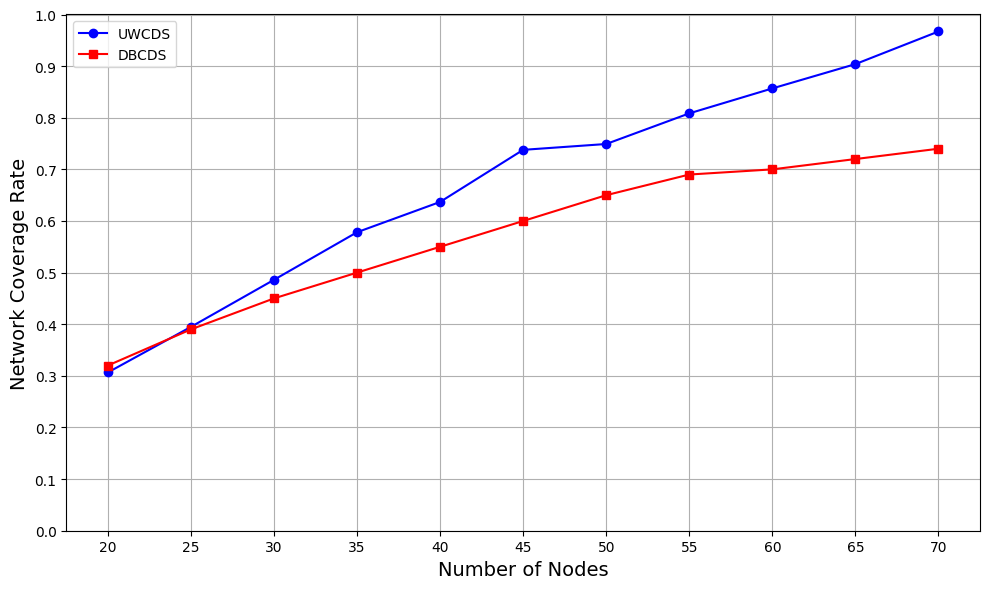


=== Summary ===
Average Coverage Rate (50 runs):
Nodes: 20, Coverage: 0.307
Nodes: 25, Coverage: 0.395
Nodes: 30, Coverage: 0.486
Nodes: 35, Coverage: 0.578
Nodes: 40, Coverage: 0.637
Nodes: 45, Coverage: 0.738
Nodes: 50, Coverage: 0.749
Nodes: 55, Coverage: 0.808
Nodes: 60, Coverage: 0.857
Nodes: 65, Coverage: 0.904
Nodes: 70, Coverage: 0.967

Reference Coverage Rate:
Nodes: 20, Coverage: 0.32
Nodes: 25, Coverage: 0.39
Nodes: 30, Coverage: 0.45
Nodes: 35, Coverage: 0.5
Nodes: 40, Coverage: 0.55
Nodes: 45, Coverage: 0.6
Nodes: 50, Coverage: 0.65
Nodes: 55, Coverage: 0.69
Nodes: 60, Coverage: 0.7
Nodes: 65, Coverage: 0.72
Nodes: 70, Coverage: 0.74


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def euclidean_distance(node1, node2):
    return np.sqrt((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)

def sense_neighbors(nodes, R_C):
    n = len(nodes)
    neighbor_lists = {i: [] for i in range(n)}
    for i in range(n):
        for j in range(n):
            if i != j:
                distance = euclidean_distance(nodes[i], nodes[j])
                if distance <= R_C:
                    neighbor_lists[i].append(j)
    return neighbor_lists

def form_cds(cluster_nodes, neighbor_lists, cluster_center, nodes):
    CDS = set()
    CN = set()

    remaining_nodes = list(cluster_nodes)
    np.random.shuffle(remaining_nodes)
    D1 = remaining_nodes.pop(0)
    CDS.add(D1)
    CN.add(D1)
    CN.update(neighbor_lists[D1])

    UN = set(cluster_nodes) - CN
    while UN:
        max_neighbors = -1
        candidates = []
        for node in UN:
            uncovered_neighbors = set(neighbor_lists[node]) - CN
            num_uncovered_neighbors = len(uncovered_neighbors)
            if num_uncovered_neighbors > max_neighbors:
                max_neighbors = num_uncovered_neighbors
                candidates = [node]
            elif num_uncovered_neighbors == max_neighbors:
                candidates.append(node)
        if candidates:
            if len(candidates) > 1:
                distances = [(node, euclidean_distance(nodes[node], cluster_center)) for node in candidates]
                Di = min(distances, key=lambda x: x[1])[0]
            else:
                Di = candidates[0]
            CDS.add(Di)
            CN.add(Di)
            CN.update(neighbor_lists[Di])
            UN = set(cluster_nodes) - CN
        else:
            break
    return CDS, CN

# Parameters for simulation
A = 100  # deployment area
m = 5    # fixed number of clusters
num_runs = 50  # Number of runs to average
node_counts = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

# Store all results for averaging
all_network_coverage = {n: [] for n in node_counts}

for run in range(num_runs):
    for n in node_counts:
        # Deploy nodes randomly in the area
        nodes = np.random.uniform(0, A, (n, 2))

        # Perform clustering using KMeans
        kmeans = KMeans(n_clusters=m, random_state=run).fit(nodes)  # Use run as random_state for reproducibility
        cluster_labels = kmeans.labels_
        cluster_centers = kmeans.cluster_centers_

        clusters = {i: [] for i in range(m)}
        for idx, label in enumerate(cluster_labels):
            clusters[label].append(idx)

        # Calculate communication radius for each cluster
        R_C_clusters = {}
        for i in range(m):
            if len(clusters[i]) > 0:
                R_C_clusters[i] = np.mean([euclidean_distance(nodes[idx], cluster_centers[i])
                                        for idx in clusters[i]])
            else:
                R_C_clusters[i] = 0

        # Sense neighbors for all nodes
        neighbor_lists = {i: [] for i in range(n)}
        for i in range(m):
            for node_idx in clusters[i]:
                for j in range(n):
                    if node_idx != j:
                        distance = euclidean_distance(nodes[node_idx], nodes[j])
                        if distance <= R_C_clusters[i]:
                            neighbor_lists[node_idx].append(j)

        # Form CDS for each cluster
        cluster_coverage = []
        for i in range(m):
            if len(clusters[i]) > 1:  # Need at least 2 nodes for coverage
                CDS, CN = form_cds(clusters[i], neighbor_lists, cluster_centers[i], nodes)
                P_cov_cluster = (len(CN) - len(CDS)) / len(clusters[i])
                cluster_coverage.append(P_cov_cluster)

        # Store coverage for this run
        if cluster_coverage:  # Only if we have valid clusters
            all_network_coverage[n].append(np.mean(cluster_coverage))
        else:
            all_network_coverage[n].append(0)

# Calculate average coverage for each node count
avg_network_coverage = [np.mean(all_network_coverage[n]) for n in node_counts]

# Additional line data
additional_nodes = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
additional_coverage = [0.32, 0.39, 0.45, 0.5, 0.55, 0.6, 0.65, 0.69, 0.7, 0.72, 0.74]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(node_counts, avg_network_coverage, marker='o', linestyle='-', color='b', label='UWCDS')
plt.plot(additional_nodes, additional_coverage, marker='s', linestyle='-', color='r', label='DBCDS')
plt.xlabel("Number of Nodes", fontsize= 14)
plt.ylabel("Network Coverage Rate", fontsize= 14)
plt.grid(True)
plt.xticks(node_counts)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()
plt.tight_layout()
plt.show()

# Print summary
print("\n=== Summary ===")
print("Average Coverage Rate (50 runs):")
for n, coverage in zip(node_counts, avg_network_coverage):
    print(f"Nodes: {n}, Coverage: {coverage:.3f}")
print("\nReference Coverage Rate:")
for n, coverage in zip(additional_nodes, additional_coverage):
    print(f"Nodes: {n}, Coverage: {coverage}")

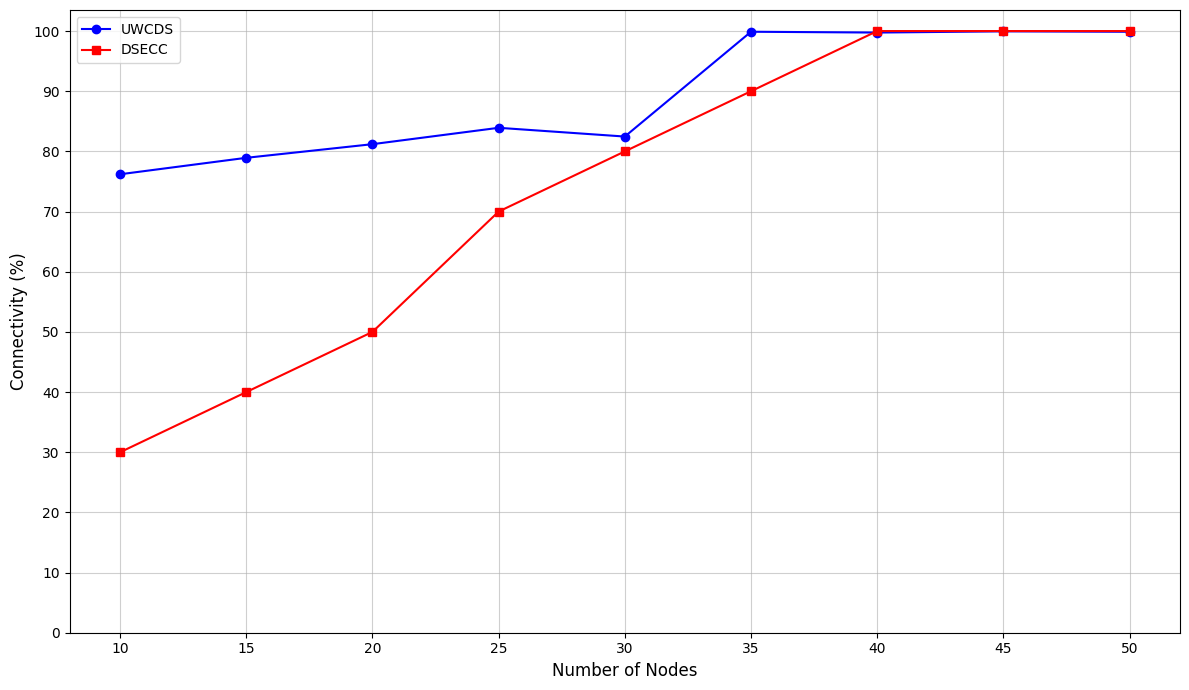


=== Final Results (Average of 5 runs) ===
Nodes     Avg R_C     Avg Connectivity  Std Dev     Min       Max       
----------------------------------------------------------------------
10        3.1623      76.20             14.82       40.00     100.00    
15        2.5820      78.93             13.22       46.67     100.00    
20        2.2361      81.20             10.42       60.00     100.00    
25        2.0000      83.92             10.10       60.00     100.00    
30        1.8257      82.47             11.54       36.67     100.00    
35        1.6903      99.89             0.80        94.29     100.00    
40        1.5811      99.75             1.25        92.50     100.00    
45        1.4907      99.96             0.31        97.78     100.00    
50        1.4142      99.88             0.62        96.00     100.00    


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import deque

def euclidean_distance(node1, node2):
    return np.sqrt((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)

def sense_neighbors(nodes, cluster_nodes, R_C):
    neighbor_lists = {i: [] for i in cluster_nodes}
    for i in cluster_nodes:
        for j in cluster_nodes:
            if i != j and euclidean_distance(nodes[i], nodes[j]) <= R_C:
                neighbor_lists[i].append(j)
    return neighbor_lists

def form_cds(cluster_nodes, neighbor_lists, cluster_center, nodes):
    CDS = set()
    CN = set()

    remaining_nodes = list(cluster_nodes)
    np.random.shuffle(remaining_nodes)
    D1 = remaining_nodes.pop(0)
    CDS.add(D1)
    CN.add(D1)
    CN.update(neighbor_lists[D1])

    UN = set(cluster_nodes) - CN

    while UN:
        max_neighbors = -1
        candidates = []

        for node in UN:
            if node not in CN:
                uncovered_neighbors = set(neighbor_lists[node]) - CN
                num_uncovered_neighbors = len(uncovered_neighbors)
                if num_uncovered_neighbors > max_neighbors:
                    max_neighbors = num_uncovered_neighbors
                    candidates = [node]
                elif num_uncovered_neighbors == max_neighbors:
                    candidates.append(node)

        if candidates:
            if len(candidates) == 1:
                Di = candidates[0]
            else:
                distances = [(node, euclidean_distance(nodes[node], cluster_center)) for node in candidates]
                Di = min(distances, key=lambda x: x[1])[0]

            CDS.add(Di)
            CN.add(Di)
            CN.update(neighbor_lists[Di])
            UN = set(cluster_nodes) - CN
        else:
            break

    return CDS

# Fixed parameters
A = 100.0  # Deployment area
sensing_range = 40.0  # Sink sensing range
node_counts = [10, 15, 20, 25, 30, 35, 40, 45, 50]
num_runs = 50  # Reduced for demonstration (originally 50)
c = 1.0  # Constant for communication range calculation

# Store all results
all_results = {n: [] for n in node_counts}
comm_range_values = []

for run in range(num_runs):
    connectivity_percentages = []

    # Sink positions (re-randomized each run)
    num_sinks = math.ceil(A / (2 * sensing_range))
    sink_positions = [(min(sensing_range + i*2*sensing_range, A), A) for i in range(num_sinks)]

    for n in node_counts:
        # Calculate node density and communication range
        node_density = n / A
        R_C = c / np.sqrt(node_density)
        comm_range_values.append(R_C)

        # Dynamic cluster adjustment
        if n <= 30:
            m = 2
            use_enhanced_params = False
        else:
            m = 5 + ((n - 30) // 5)
            use_enhanced_params = True

        # Generate and cluster nodes
        nodes = np.random.uniform(0, A, (n, 2))
        kmeans = KMeans(n_clusters=m, random_state=run).fit(nodes)
        clusters = {i: np.where(kmeans.labels_ == i)[0].tolist() for i in range(m)}
        cluster_centers = kmeans.cluster_centers_

        # Calculate R_C for each cluster (using density-based R_C as base)
        R_C_clusters = {}
        for i in range(m):
            if use_enhanced_params:
                max_dist = max([euclidean_distance(nodes[idx], cluster_centers[i]) for idx in clusters[i]])
                R_C_clusters[i] = max(max_dist * 3, R_C)
            else:
                # Fixed mean calculation - convert to list first
                distances = [euclidean_distance(nodes[idx], cluster_centers[i]) for idx in clusters[i]]
                R_C_clusters[i] = max(np.mean(distances), R_C)

        # Form CDS for each cluster
        cds_clusters = {}
        for i in range(m):
            cluster_nodes = clusters[i]
            neighbor_lists = sense_neighbors(nodes, cluster_nodes, R_C_clusters[i])
            cds_clusters[i] = form_cds(cluster_nodes, neighbor_lists, cluster_centers[i], nodes)

        # Initialize connection tracking
        connected_nodes = set()
        non_connected_nodes = set(range(n))

        # Build global neighbor lists
        global_neighbor_lists = {i: [] for i in range(n)}
        for i in range(m):
            cluster_nodes = clusters[i]
            R_C = R_C_clusters[i]
            for node_idx in cluster_nodes:
                for j in range(n):
                    if node_idx != j and euclidean_distance(nodes[node_idx], nodes[j]) <= R_C:
                        global_neighbor_lists[node_idx].append(j)

        # Connect CDS nodes to sinks with appropriate range
        all_cds_nodes = set().union(*cds_clusters.values())
        cds_in_sink_range = set()
        sink_coverage = 2.5 * sensing_range if use_enhanced_params else 2 * sensing_range

        for sink_pos in sink_positions:
            for cds_node in all_cds_nodes:
                if euclidean_distance(nodes[cds_node], sink_pos) <= sink_coverage:
                    cds_in_sink_range.add(cds_node)
                    connected_nodes.add(cds_node)
                    non_connected_nodes.discard(cds_node)

        # Propagate connections
        queue = deque(cds_in_sink_range)
        visited = set(cds_in_sink_range)

        while queue:
            current = queue.popleft()
            for neighbor in global_neighbor_lists[current]:
                if neighbor in non_connected_nodes:
                    connected_nodes.add(neighbor)
                    non_connected_nodes.remove(neighbor)
                    if neighbor in cds_in_sink_range:
                        queue.append(neighbor)

        # Calculate connectivity
        connectivity_percentage = (len(connected_nodes) / n) * 100
        connectivity_percentages.append(connectivity_percentage)
        all_results[n].append(connectivity_percentage)
        param_status = "Enhanced" if use_enhanced_params else "Original"

# Calculate averages
avg_connectivity = [np.mean(all_results[n]) for n in node_counts]
avg_comm_range = [c / np.sqrt(n/A) for n in node_counts]  # Theoretical average

# Plotting connectivity results
plt.figure(figsize=(12, 7))
plt.plot(node_counts, avg_connectivity, marker='o', linestyle='-',
         color='b', label='UWCDS')
plt.plot([10, 15, 20, 25, 30, 35, 40, 45, 50],
         [30, 40, 50, 70, 80, 90, 100, 100, 100],
         marker='s', linestyle='-', color='r', label='DSECC')
plt.xlabel('Number of Nodes', fontsize=12)
plt.ylabel('Connectivity (%)', fontsize=12)
plt.grid(True, linestyle='-', alpha=0.6)
plt.xticks(node_counts)
plt.yticks(range(0, 101, 10))
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


# Print summary
print("\n=== Final Results (Average of 5 runs) ===")
print(f"{'Nodes':<10}{'Avg R_C':<12}{'Avg Connectivity':<18}{'Std Dev':<12}{'Min':<10}{'Max':<10}")
print("-"*70)
for n in node_counts:
    avg_r = c / np.sqrt(n/A)
    avg_c = np.mean(all_results[n])
    std = np.std(all_results[n])
    min_val = min(all_results[n])
    max_val = max(all_results[n])
    print(f"{n:<10}{avg_r:<12.4f}{avg_c:<18.2f}{std:<12.2f}{min_val:<10.2f}{max_val:<10.2f}")



Nodes: 20, Avg Comm Range: 22.36
Nodes: 25, Avg Comm Range: 20.00
Nodes: 30, Avg Comm Range: 18.26
Nodes: 35, Avg Comm Range: 16.90
Nodes: 40, Avg Comm Range: 15.81
Nodes: 45, Avg Comm Range: 14.91
Nodes: 50, Avg Comm Range: 14.14
Nodes: 55, Avg Comm Range: 13.48
Nodes: 60, Avg Comm Range: 12.91
Nodes: 65, Avg Comm Range: 12.40
Nodes: 70, Avg Comm Range: 11.95


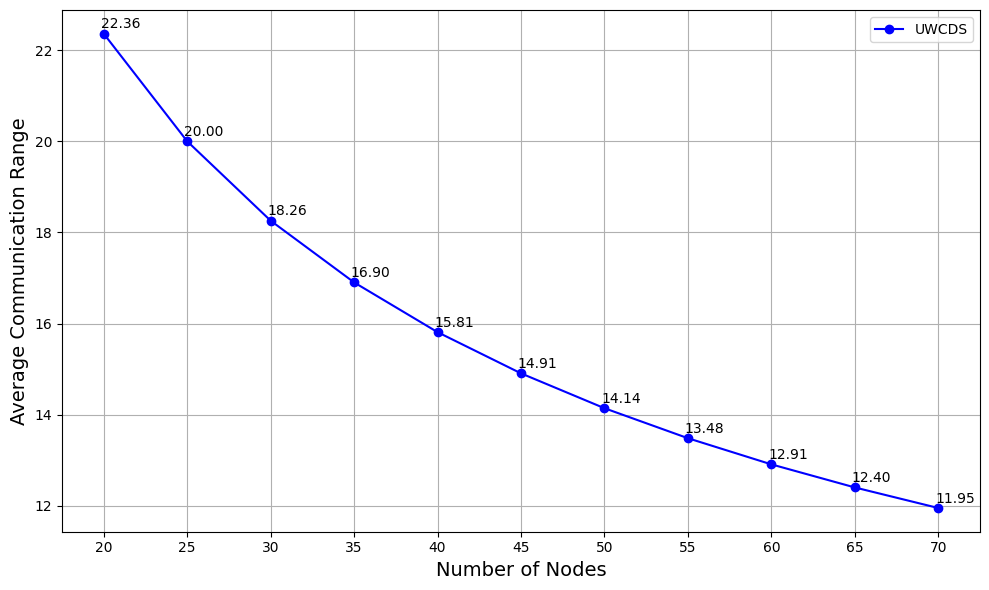


Results:
Nodes     Avg Comm Range 
-------------------------
20        22.36          
25        20.00          
30        18.26          
35        16.90          
40        15.81          
45        14.91          
50        14.14          
55        13.48          
60        12.91          
65        12.40          
70        11.95          


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixed parameters
A = 100.0  # Deployment area (100x100)
num_simulations = 50  # Number of simulations per node count
c = 1.0  # Tunable constant for communication range

node_counts = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
avg_comm_ranges = []

for n in node_counts:
    comm_range_values = []

    for sim in range(num_simulations):
        # Deploy nodes randomly
        nodes = np.random.uniform(0, A, (n, 2))

        # Calculate node density
        node_density = n / (A * A)

        # Calculate communication range based on density
        R_C = c / np.sqrt(node_density)
        comm_range_values.append(R_C)

    # Calculate average across all simulations
    avg_comm_ranges.append(np.mean(comm_range_values))
    print(f"Nodes: {n}, Avg Comm Range: {avg_comm_ranges[-1]:.2f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(node_counts, avg_comm_ranges, marker='o', linestyle='-', color='blue', label='UWCDS')
for x, y in zip(node_counts, avg_comm_ranges):
    plt.text(x+1, y + 0.05, f'{y:.2f}', ha='center', va='bottom')
plt.xlabel("Number of Nodes", fontsize= 14)
plt.ylabel("Average Communication Range", fontsize= 14)
plt.grid(True)
plt.legend()
plt.xticks(node_counts)
plt.tight_layout()
plt.show()

# Print results
print("\nResults:")
print(f"{'Nodes':<10}{'Avg Comm Range':<15}")
print("-" * 25)
for n, r in zip(node_counts, avg_comm_ranges):
    print(f"{n:<10}{r:<15.2f}")



Testing sensing range: 10 (Rs = 20)
  Run 1/30: 10.0%
  Run 2/30: 8.0%
  Run 3/30: 30.0%
  Run 4/30: 12.0%
  Run 5/30: 22.0%
  Run 6/30: 26.0%
  Run 7/30: 28.0%
  Run 8/30: 24.0%
  Run 9/30: 6.0%
  Run 10/30: 16.0%
  Run 11/30: 18.0%
  Run 12/30: 20.0%
  Run 13/30: 6.0%
  Run 14/30: 16.0%
  Run 15/30: 20.0%
  Run 16/30: 24.0%
  Run 17/30: 24.0%
  Run 18/30: 24.0%
  Run 19/30: 24.0%
  Run 20/30: 16.0%
  Run 21/30: 28.0%
  Run 22/30: 10.0%
  Run 23/30: 12.0%
  Run 24/30: 10.0%
  Run 25/30: 16.0%
  Run 26/30: 12.0%
  Run 27/30: 8.0%
  Run 28/30: 10.0%
  Run 29/30: 16.0%
  Run 30/30: 18.0%

Testing sensing range: 15 (Rs = 30)
  Run 1/30: 18.0%
  Run 2/30: 46.0%
  Run 3/30: 36.0%
  Run 4/30: 24.0%
  Run 5/30: 30.0%
  Run 6/30: 30.0%
  Run 7/30: 38.0%
  Run 8/30: 32.0%
  Run 9/30: 20.0%
  Run 10/30: 30.0%
  Run 11/30: 34.0%
  Run 12/30: 36.0%
  Run 13/30: 34.0%
  Run 14/30: 10.0%
  Run 15/30: 24.0%
  Run 16/30: 40.0%
  Run 17/30: 24.0%
  Run 18/30: 28.0%
  Run 19/30: 34.0%
  Run 20/30: 24.0

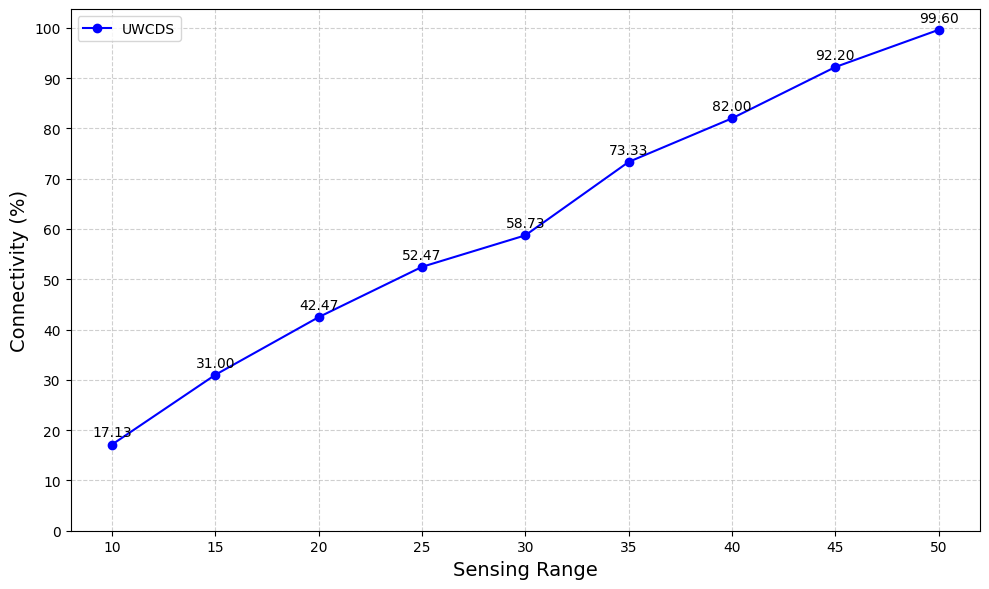


=== Connectivity(%) vs Sensing Range ===
Sensing Range  Rs        Avg (%)   Std Dev   95% CI    
-------------------------------------------------------
10             20        17.1      6.98      ±2.50
15             30        31.0      8.16      ±2.92
20             40        42.5      8.94      ±3.20
25             50        52.5      7.98      ±2.85
30             60        58.7      7.07      ±2.53
35             70        73.3      6.60      ±2.36
40             80        82.0      7.48      ±2.68
45             90        92.2      5.35      ±1.91
50             100       99.6      0.95      ±0.34


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import deque

def euclidean_distance(node1, node2):
    return np.sqrt((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)

def sense_neighbors(nodes, cluster_nodes, R_C):
    """Calculate neighbor lists within communication range R_C"""
    neighbor_lists = {i: [] for i in cluster_nodes}
    for i in cluster_nodes:
        for j in cluster_nodes:
            if i != j and euclidean_distance(nodes[i], nodes[j]) <= R_C:
                neighbor_lists[i].append(j)
    return neighbor_lists

def form_cds(cluster_nodes, neighbor_lists, cluster_center, nodes):
    """Form Connected Dominating Set for a cluster"""
    CDS = set()
    CN = set()

    # Start with random node
    remaining_nodes = list(cluster_nodes)
    np.random.shuffle(remaining_nodes)
    D1 = remaining_nodes.pop(0)
    CDS.add(D1)
    CN.add(D1)
    CN.update(neighbor_lists[D1])

    # Greedy expansion
    UN = set(cluster_nodes) - CN
    while UN:
        max_neighbors = -1
        candidates = []
        for node in UN:
            uncovered = set(neighbor_lists[node]) - CN
            if len(uncovered) > max_neighbors:
                max_neighbors = len(uncovered)
                candidates = [node]
            elif len(uncovered) == max_neighbors:
                candidates.append(node)

        if candidates:
            # Select node closest to center if tie
            Di = min(candidates, key=lambda x: euclidean_distance(nodes[x], cluster_center))
            CDS.add(Di)
            CN.add(Di)
            CN.update(neighbor_lists[Di])
            UN = set(cluster_nodes) - CN
        else:
            break
    return CDS

# Fixed parameters
A = 100.0  # Deployment area (100x100)
n = 50     # Number of nodes
sensing_ranges = [10, 15, 20, 25, 30, 35, 40, 45, 50]  # Base sensing ranges to test
num_runs = 30      # Runs per sensing range

# Sink placement along right edge (x=100)
num_sinks = 3  # Fixed number of sinks
sink_positions = [(A, A*(i+1)/(num_sinks+1)) for i in range(num_sinks)]  # Positions: (100,25), (100,50), (100,75)

# Results storage
results = {sr: [] for sr in sensing_ranges}

for sensing_range in sensing_ranges:
    Rs =  2* sensing_range  # Actual sink range
    print(f"\nTesting sensing range: {sensing_range} (Rs = {Rs})")

    for run in range(num_runs):
        # Generate nodes
        nodes = np.random.uniform(0, A, (n, 2))

        # Cluster nodes (5 clusters for 50 nodes)
        kmeans = KMeans(n_clusters=5, random_state=run).fit(nodes)
        clusters = {i: np.where(kmeans.labels_ == i)[0].tolist() for i in range(5)}
        cluster_centers = kmeans.cluster_centers_

        # Calculate communication range as mean distance to cluster head
        R_C_clusters = {}
        for i in range(5):
            distances = [euclidean_distance(nodes[idx], cluster_centers[i]) for idx in clusters[i]]
            R_C_clusters[i] = np.mean(distances) if distances else 0

        # Form CDS for each cluster
        cds_nodes = set()
        for i in range(5):
            neighbors = sense_neighbors(nodes, clusters[i], R_C_clusters[i])
            cds_nodes.update(form_cds(clusters[i], neighbors, cluster_centers[i], nodes))

        # Connect nodes to sinks
        connected = set()
        for sink in sink_positions:
            # Direct connections to sinks (using Rs)
            for node in cds_nodes:
                if euclidean_distance(nodes[node], sink) <= Rs:
                    connected.add(node)

            # Multi-hop connections through CDS backbone
            queue = deque([n for n in connected if n in cds_nodes])
            while queue:
                current = queue.popleft()
                for j in range(n):
                    # Use cluster-specific communication range
                    cluster_id = kmeans.labels_[current]
                    if (euclidean_distance(nodes[current], nodes[j]) <= R_C_clusters[cluster_id] and
                        j not in connected):
                        connected.add(j)
                        if j in cds_nodes:
                            queue.append(j)

        connectivity = len(connected)/n * 100
        results[sensing_range].append(connectivity)
        print(f"  Run {run+1}/{num_runs}: {connectivity:.1f}%")

# Calculate statistics
avg_conn = [np.mean(results[sr]) for sr in sensing_ranges]
std_dev = [np.std(results[sr]) for sr in sensing_ranges]
ci95 = [1.96*s/math.sqrt(num_runs) for s in std_dev]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sensing_ranges, avg_conn,marker='o', linestyle='-', color='b', label='UWCDS')
# Add values above markers
for x, y in zip(sensing_ranges, avg_conn):
    plt.text(x, y + 1, f'{y:.2f}', ha='center', va='bottom')  # Adjust 0.02 for vertical offset
plt.xlabel('Sensing Range', fontsize=14)
plt.ylabel('Connectivity (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(sensing_ranges)
plt.yticks(np.arange(0, 101, 10))
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

# Print results table
print("\n=== Connectivity(%) vs Sensing Range ===")
print(f"{'Sensing Range':<15}{'Rs':<10}{'Avg (%)':<10}{'Std Dev':<10}{'95% CI':<10}")
print("-"*55)
for sr, avg, sd, ci in zip(sensing_ranges, avg_conn, std_dev, ci95):
    print(f"{sr:<15}{2*sr:<10}{avg:<10.1f}{sd:<10.2f}±{ci:.2f}")

Testing network-wide CDS formation for 100 nodes...

Communication radius (R_C): 10.00 meters
At 10 iterations: Coverage ratio = 0.520
At 20 iterations: Coverage ratio = 0.750
At 30 iterations: Coverage ratio = 0.890
At 40 iterations: Coverage ratio = 0.910
At 50 iterations: Coverage ratio = 0.900
At 60 iterations: Coverage ratio = 0.950
At 70 iterations: Coverage ratio = 0.970
At 80 iterations: Coverage ratio = 0.980
At 90 iterations: Coverage ratio = 0.990
At 100 iterations: Coverage ratio = 1.000


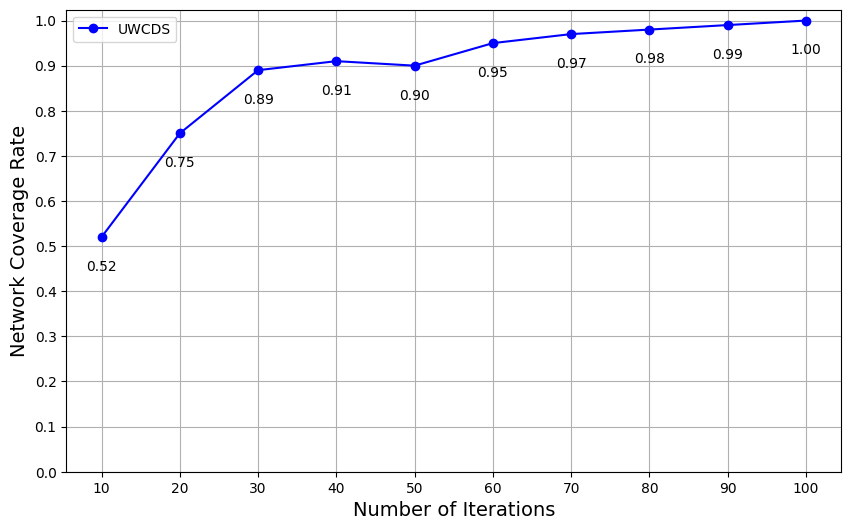

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def euclidean_distance(node1, node2):
    return np.sqrt((node1[0] - node2[0])**2 + (node1[1] - node2[1])**2)

def sense_neighbors(nodes, R_C):
    n = len(nodes)
    neighbor_lists = {i: [] for i in range(n)}
    for i in range(n):
        for j in range(n):
            if i != j:
                distance = euclidean_distance(nodes[i], nodes[j])
                if distance <= R_C:
                    neighbor_lists[i].append(j)
    return neighbor_lists

def form_network_cds(nodes, neighbor_lists, cluster_centers, cluster_mapping, n, max_iterations=None):
    CDS = set()
    CN = set()
    iterations = 0
    dominator_log = []

    all_nodes = set(range(len(nodes)))
    remaining_nodes = list(all_nodes)
    np.random.shuffle(remaining_nodes)

    while len(CN) < n and remaining_nodes and (max_iterations is None or iterations < max_iterations):
        if not CDS:
            Di = min(remaining_nodes,
                    key=lambda x: euclidean_distance(nodes[x], cluster_centers[cluster_mapping[x]]))
        else:
            Di = max(remaining_nodes,
                    key=lambda x: len(set(neighbor_lists[x]) - CN))

        CDS.add(Di)
        new_coverage = set(neighbor_lists[Di]) - CN
        CN.update(neighbor_lists[Di])
        CN.add(Di)
        iterations += 1

        coverage_ratio = (len(CN)) / n  # Coverage quality = (covered non-CDS nodes)/total nodes
        dominator_log.append((iterations, Di, len(new_coverage), coverage_ratio))

        remaining_nodes.remove(Di)

    return dominator_log

# Simulation parameters
A = 100   # Area size
n=100     # Number of nodes
m = 5    # Number of clusters
iteration_points = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

print(f"Testing network-wide CDS formation for {n} nodes...")

# Generate node positions
nodes = np.random.uniform(0, A, (n, 2))

# Cluster the nodes
kmeans = KMeans(n_clusters=m, random_state=42).fit(nodes)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Create cluster mapping
cluster_mapping = {i: cluster_labels[i] for i in range(n)}

# Calculate R_C
node_density = n / (A * A)
R_C = 1 / np.sqrt(node_density)
print(f"\nCommunication radius (R_C): {R_C:.2f} meters")

# Build neighbor lists
neighbor_lists = sense_neighbors(nodes, R_C)

# Run simulation for different iteration points
results = {}
for max_iter in iteration_points:
    log = form_network_cds(nodes, neighbor_lists, cluster_centers, cluster_mapping, n, max_iter)
    coverage = log[-1][3] if log else 0.0
    results[max_iter] = coverage
    print(f"At {max_iter} iterations: Coverage ratio = {coverage:.3f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='-', color='b', label='UWCDS')
for x, y in zip(results.keys(), results.values()):
    plt.text(x, y - 0.05, f'{y:.2f}', ha='center', va='top', fontsize=10, color='black')
plt.xlabel("Number of Iterations", fontsize= 14)
plt.ylabel("Network Coverage Rate", fontsize= 14)
plt.xticks(iteration_points)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.legend()
plt.show()